# Integration of ordinary differential equations


## Problem statement 

Consider a situation in which a solutioin,y(t) to a differentail equation 


$$\frac{dy_{t}}{dt} = f(y(t,t)) $$

is to be approximated by computer starting from some known initial condition, $y(t_0)=y_0$




<!-- One dimendsional differential equation for 
$$\frac{ds(t)}{dt} = f(s,t)$$
- $t_0 \lt t \lt t_f$ 
- $s(t=t_0) = s_0$ -->

- Depending of the form of $f$, $y(t)$ might be difficult to obtain analytically



## Explicit Euler Scheme


<div class="alert alert-block" style="background-color:lightgray; border-color:black black black black">
    In mathematics and computational science, the Euler method (also called the forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.
</div>

**Growth of population**

$$\frac{d(st)}{dt} = f(s,t) , \text{  }f(s,t) = \nu(1-\frac{s(t)}{C}) *s(t)$$

***
$$s(t)= \frac{C}{1+\frac{C-s_0}{s_0} * exp(-\nu t )}$$



Taylor expression to find approximate solution a $t_1 = t_0 +\Delta$

\begin{equation}
\begin{aligned}
s(t_0 +\Delta t) & = s(t_0) + \Delta t * \frac{ds(t0)}{dt} + \mathcal{O}(\Delta t^2) \\
                 & = s(t_0) + \Delta t f(s,t_0)
\end{aligned} 
\end{equation}

- It s dynamical system
- $s(t_{n+1}$ depends explicilty of $s(t_n)$)
- The Euler method is explicit, i.e. the solution  $y_{n+1}$ is an explicit function of 
$y_{i}$ for $i\leq n$.
-  You calculate an approximation of the derivative and take a step in its direction 

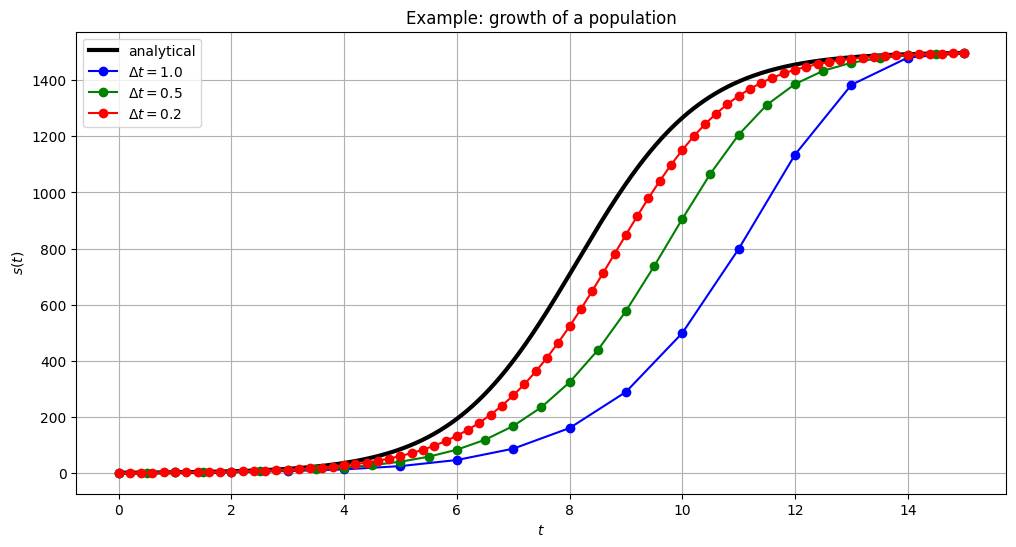

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nu = 0.9  # Growth rate
C = 1500  # Carrying capacity
s0 = 1  # Initial population
t_end = 15  # End time

# Analytical solution function
def analytical_solution(t, s0, nu, C):
    return C / (1 + ((C - s0) / s0) * np.exp(-nu * t))

# Euler method function
def euler_method(s0, nu, C, dt, t_end):
    t_values = np.arange(0, t_end + dt, dt)
    s_values = np.zeros_like(t_values)
    s_values[0] = s0
    
    for i in range(1, len(t_values)):
        s_values[i] = s_values[i-1] + dt * nu * s_values[i-1] * (1 - s_values[i-1] / C)
    
    return t_values, s_values

# Different time steps
dts = [1.0, 0.5, 0.2]
colors = ['blue', 'green', 'red']
labels = [r'$\Delta t = 1.0$', r'$\Delta t = 0.5$', r'$\Delta t = 0.2$']

# Plotting
plt.figure(figsize=(12, 6))

# Analytical solution
t_analytical = np.linspace(0, t_end, 1400)
s_analytical = analytical_solution(t_analytical, s0, nu, C)
plt.plot(t_analytical, s_analytical, 'k', linewidth=3, label='analytical')

# Euler method solutions
for dt, color, label in zip(dts, colors, labels):
    t_values, s_values = euler_method(s0, nu, C, dt, t_end)
    plt.plot(t_values, s_values, 'o-', color=color, label=label)

plt.xlabel(r'$t$')
plt.ylabel(r'$s(t)$')
plt.title('Example: growth of a population')
plt.legend()
plt.grid(True)
plt.show()


## Implicit Euler scheme

backward euler scheme 

$$s(j+1) = s_{j} + \Delta t f(s_{j+1},t_{j+1})$$

In [87]:


# Analytical solution function
def analytical_solution(t, s0, k):
    return s0 * np.exp(-k * t)

# Explicit Euler method function
def explicit_euler(s0, k, dt, t_end):
    t_values = np.arange(t0, t_end + dt, dt)
    s_values = np.zeros_like(t_values)
    s_values[0] = s0
    
    for i in range(1, len(t_values)):
        s_values[i] = s_values[i-1] * (1 - k * dt)
    
    return t_values, s_values


# Implicit Euler method function
def implicit_euler(s0, k, dt, t_end):
    t_values = np.arange(t0, t_end + dt, dt)
    s_values = np.zeros_like(t_values)
    s_values[0] = s0
    
    for i in range(1, len(t_values)):
        s_values[i] = s_values[i-1] / (1 + k * dt)
    
    return t_values, s_values




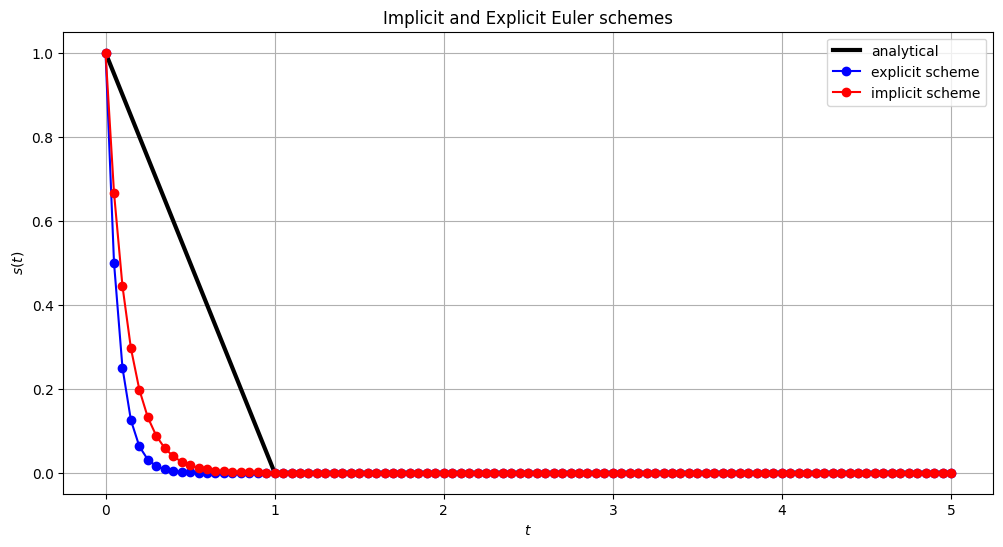

In [88]:
# Time step
dt = 0.05
# Parameters
s0 = 1  # Initial population
t0 = 0  # Start time
tf = 5  # End time
k = 10  # Decay rate


# Plotting
plt.figure(figsize=(12, 6))

# Analytical solution
t_analytical = np.linspace(t0, tf, 6)
s_analytical = analytical_solution(t_analytical, s0, k)
plt.plot(t_analytical, s_analytical, 'k', linewidth=3, label='analytical')

# Explicit Euler solution
t_values_explicit, s_values_explicit = explicit_euler(s0, k, dt, tf)
plt.plot(t_values_explicit, s_values_explicit, 'o-', color='blue', label='explicit scheme')

# Implicit Euler solution
t_values_implicit, s_values_implicit = implicit_euler(s0, k, dt, tf)
plt.plot(t_values_implicit, s_values_implicit, 'o-', color='red', label='implicit scheme')

plt.xlabel(r'$t$')
plt.ylabel(r'$s(t)$')
plt.title('Implicit and Explicit Euler schemes')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
s0 = 1  # Initial population
t0 = 0  # Start time
tf = 8  # End time
k = 10  # Decay rate

In [89]:
t_values_explicit, s_values_explicit = implicit_euler(s0, k, 0.05, tf)
print('Implicit')
res = pd.DataFrame({'t_values':t_values_explicit,
                    's_values':s_values_explicit},
                   )

res[res['t_values'] == 4.0]

Implicit


,t_values,s_values
80,4.0,8.178982e-15


In [91]:
t_values_explicit, s_values_explicit = explicit_euler(s0, k, dt=0.05, t_end=tf)
print('EXPLICIT')

res = pd.DataFrame({'t_values':t_values_explicit,
                    's_values':s_values_explicit},
                   )

res[res['t_values'] == 3.]

EXPLICIT


,t_values,s_values
60,3.0,8.673617e-19


## Runge Kutta


https://lpsa.swarthmore.edu/NumInt/NumIntSecond.html

## Good references 
- https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html